In [1]:
import pandas as pd

In [2]:

dados = pd.read_csv('/content/drive/MyDrive/Bootcamp_ALURA/Portifolio-Alura/Diário/Módulo 4/Bases de Dados/A145400189_28_143_208.csv', encoding= 'ISO-8859-1', delimiter=';', skiprows= 3, skipfooter= 17, engine = 'python')

In [3]:
dados = dados.drop('Total', axis=1)

In [4]:
dados.dtypes

Ano Diagnóstico    int64
Jan                int64
Fev                int64
Mar                int64
Abr                int64
Mai                int64
Jun                int64
Jul                int64
Ago                int64
Set                int64
Out                int64
Nov                int64
Dez                int64
dtype: object

In [5]:
dados

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541
5,2006,7385,6687,8132,6804,7593,6984,7101,7722,6793,7005,6674,6151
6,2007,7342,6204,8115,7266,7368,6591,7184,7564,6712,7465,6695,6094
7,2008,7355,6646,7278,7612,6895,6929,7688,7797,7631,7564,6799,6574
8,2009,7113,6452,8146,7514,7168,6702,7443,7368,7388,7285,7016,6723
9,2010,6912,6403,8308,7049,6973,6621,7128,7389,7165,7210,7047,7176


In [6]:
dados_melt = dados.melt(id_vars= ['Ano Diagnóstico'])

In [7]:
dados_melt.head()
dados_melt['Ano Diagnóstico'] = dados_melt['Ano Diagnóstico'].astype(str)

In [8]:
dados_melt

,Ano Diagnóstico,variable,value
0,2001,Jan,8088
1,2002,Jan,8013
2,2003,Jan,8115
3,2004,Jan,7574
4,2005,Jan,7432
...,...,...,...
223,2015,Dez,6844
224,2016,Dez,6672
225,2017,Dez,7020
226,2018,Dez,6900


In [9]:
d = {'Jan': '01', 'Fev': '02', 'Mar': '03', 'Abr': '04','Mai': '05', 'Jun': '06', 'Jul': '07', 'Ago': '08', 'Set': '09','Out': '10', 'Nov': '11', 'Dez': '12' }

In [10]:
dados_melt['ANOMES'] = dados_melt['Ano Diagnóstico'] + dados_melt['variable'].map(d) 

In [11]:
dados_melt

,Ano Diagnóstico,variable,value,ANOMES
0,2001,Jan,8088,200101
1,2002,Jan,8013,200201
2,2003,Jan,8115,200301
3,2004,Jan,7574,200401
4,2005,Jan,7432,200501
...,...,...,...,...
223,2015,Dez,6844,201512
224,2016,Dez,6672,201612
225,2017,Dez,7020,201712
226,2018,Dez,6900,201812


In [12]:
dados_final = dados_melt.drop(['Ano Diagnóstico','variable' ], axis = 1)

In [13]:
dados_final = dados_final.rename(columns={"value": "CASOS"})

In [14]:
dados_final = dados_final.sort_values(by=['ANOMES'])

In [15]:
dados_final = dados_final.reset_index(drop=True)

In [16]:
import matplotlib.pyplot as plt

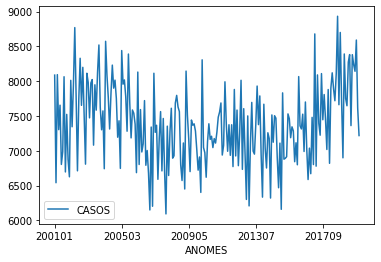

In [17]:
dados_final.plot(x = 'ANOMES', y = 'CASOS' )

In [18]:
dados_final['ANOMES'] = pd.to_datetime(dados_final['ANOMES'], format= '%Y%m')

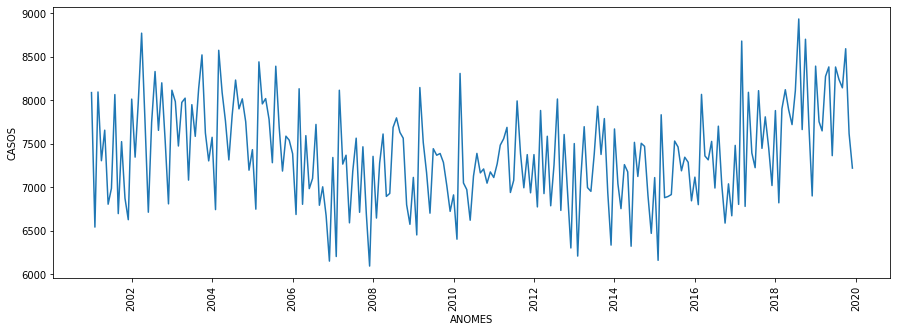

In [19]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.lineplot(x='ANOMES', y = 'CASOS', data = dados_final)
plt.xticks(rotation = 90)
plt.show()

In [20]:
def plot_line(DataF, columnx, columny):
  plt.figure(figsize=(15,5))
  sns.lineplot(x=columnx, y = columny, data = DataF)
  plt.xticks(rotation = 90)
  plt.show()

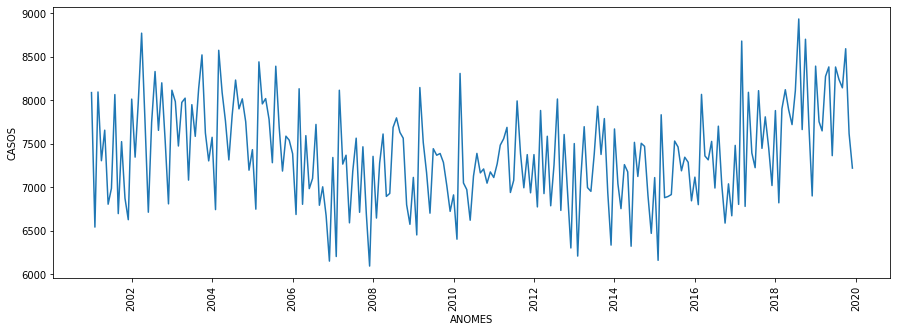

In [21]:
plot_line(dados_final, 'ANOMES', 'CASOS')

In [22]:
dados_final['media_movel'] = dados_final['CASOS'].rolling(3).mean()

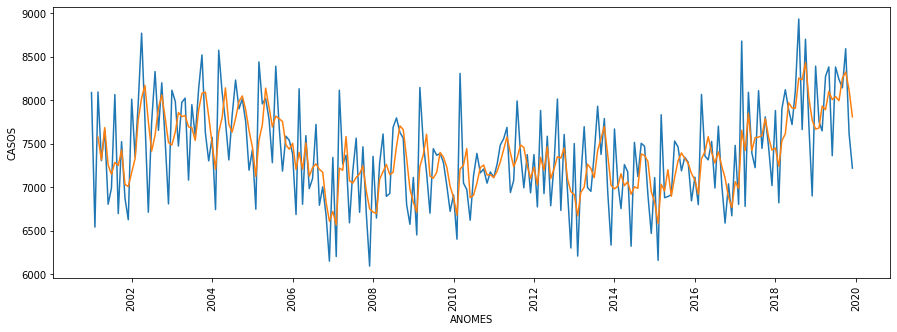

In [23]:
plt.figure(figsize=(15,5))
sns.lineplot(x='ANOMES', y = 'CASOS', data = dados_final)
sns.lineplot(x='ANOMES', y = 'media_movel', data = dados_final)
plt.xticks(rotation = 90)
plt.show()

In [24]:
dados_final['media_movel_6'] = dados_final['CASOS'].rolling(6).mean()

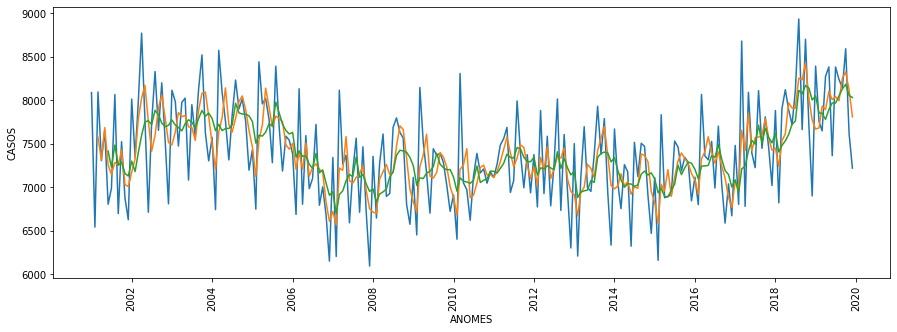

In [25]:
plt.figure(figsize=(15,5))
sns.lineplot(x='ANOMES', y = 'CASOS', data = dados_final)
sns.lineplot(x='ANOMES', y = 'media_movel', data = dados_final)
sns.lineplot(x='ANOMES', y = 'media_movel_6', data = dados_final)
plt.xticks(rotation = 90)
plt.show()

In [26]:
dados_final['media_movel_3_C'] = dados_final['CASOS'].rolling(3, center = True).mean()

In [27]:
dados_final

,CASOS,ANOMES,media_movel,media_movel_6,media_movel_3_C
0,8088,2001-01-01,NaN,NaN,NaN
1,6542,2001-02-01,NaN,NaN,7575.000000
2,8095,2001-03-01,7575.000000,NaN,7314.000000
3,7305,2001-04-01,7314.000000,NaN,7685.333333
4,7656,2001-05-01,7685.333333,NaN,7255.333333
...,...,...,...,...,...
223,8239,2019-08-01,7994.666667,8048.166667,8254.666667
224,8143,2019-09-01,8254.666667,8130.666667,8324.666667
225,8592,2019-10-01,8324.666667,8183.666667,8116.666667
226,7615,2019-11-01,8116.666667,8055.666667,7809.000000


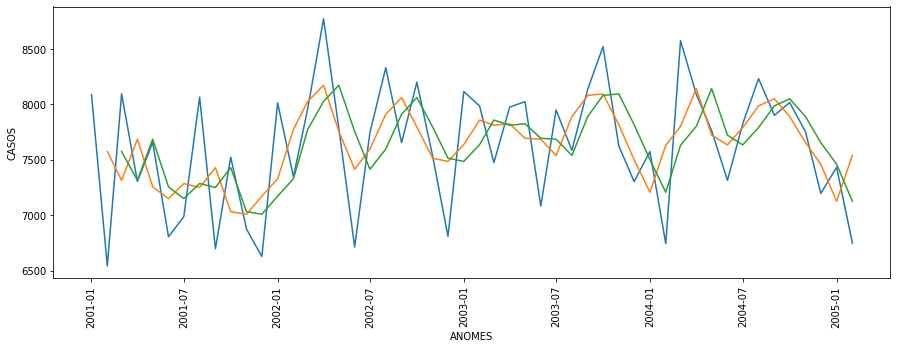

In [28]:
plt.figure(figsize=(15,5))
sns.lineplot(x='ANOMES', y = 'CASOS', data = dados_final[:50])
sns.lineplot(x='ANOMES', y = 'media_movel_3_C', data = dados_final[:50])
sns.lineplot(x='ANOMES', y = 'media_movel', data = dados_final[:50])
plt.xticks(rotation = 90)
plt.show()

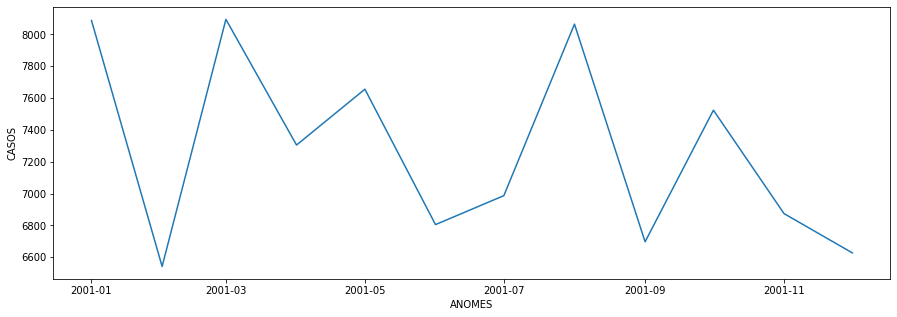

In [29]:
plt.figure(figsize=(15,5))
sns.lineplot(x="ANOMES", y = "CASOS", data= dados_final[:12])

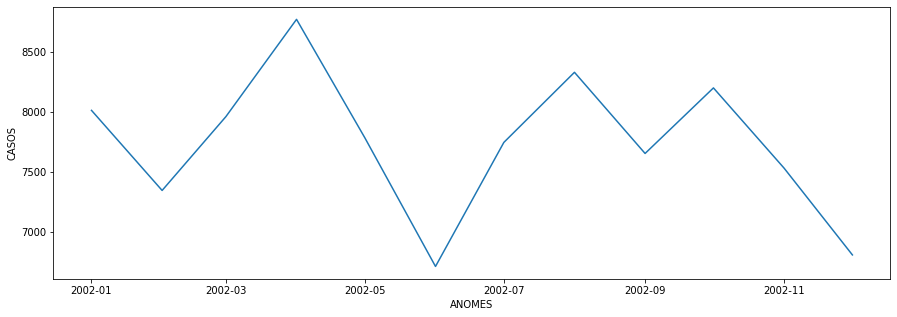

In [30]:
plt.figure(figsize=(15,5))
sns.lineplot(x="ANOMES", y = "CASOS", data= dados_final[12:24])

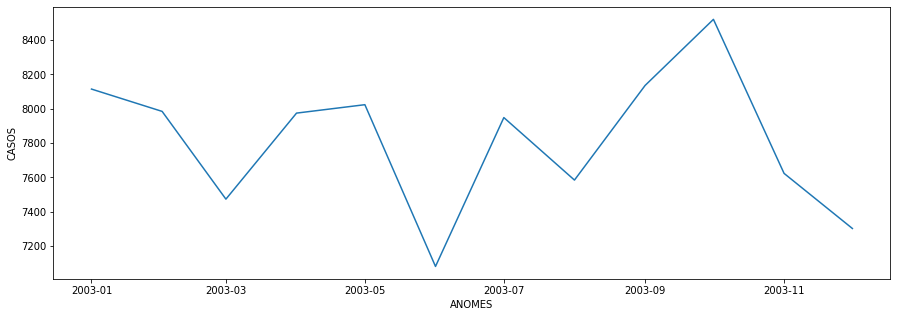

In [31]:
plt.figure(figsize=(15,5))
sns.lineplot(x="ANOMES", y = "CASOS", data= dados_final[24:36])

In [32]:
dados_final = dados_final[['CASOS', 'ANOMES']]

In [33]:
dados_final['ANO'] = dados_final['ANOMES'].dt.year
dados_final['MES'] = dados_final['ANOMES'].dt.month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
dados_final['ANO'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

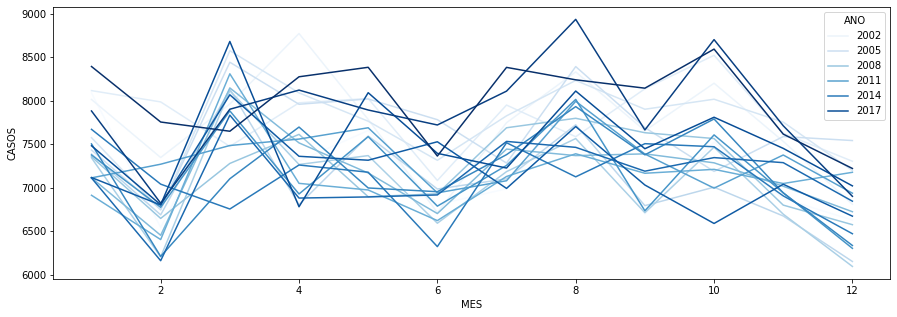

In [35]:
plt.figure(figsize=(15,5))
sns.lineplot(x="MES", y = "CASOS", data= dados_final, hue = 'ANO', palette= 'Blues')

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

#dados_decomp = dados_final.set_index('DATA')



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


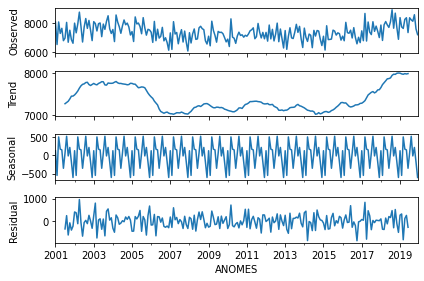

In [37]:
decomposicao = seasonal_decompose(dados_final[['ANOMES', 'CASOS']].set_index('ANOMES'), model='')
decomposicao.plot();

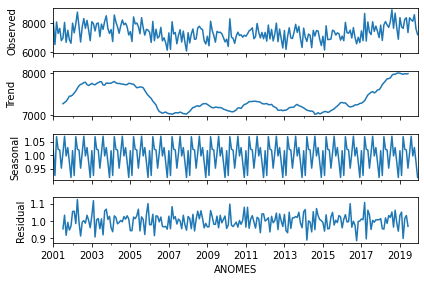

In [38]:
decomposicao_Mult = seasonal_decompose(dados_final[['ANOMES', 'CASOS']].set_index('ANOMES'), model='multiplicative')
decomposicao_Mult.plot();

### Teste comparativo

In [39]:
url_pass = 'https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/AirPassengers.csv'
dados_pass = pd.read_csv(url_pass)

In [45]:

dados_pass['Month'] = pd.to_datetime(dados_pass['Month'])
dados_pass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


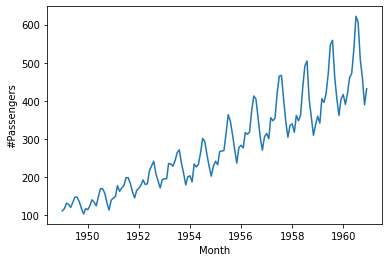

In [46]:
sns.lineplot(x = "Month", y = "#Passengers", data = dados_pass)

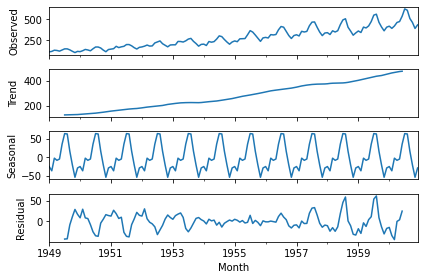

In [49]:
decomposicao_p = seasonal_decompose(dados_pass.set_index('Month'))
decomposicao_p.plot();

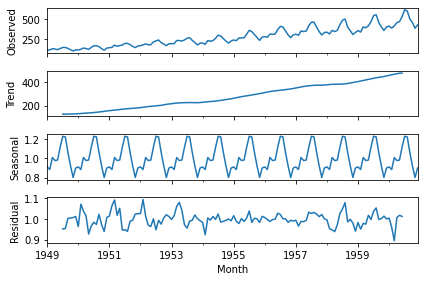

In [50]:
decomposicao_p = seasonal_decompose(dados_pass.set_index('Month'), model = 'multiplicative')
decomposicao_p.plot();

<Figure size 1080x360 with 0 Axes>

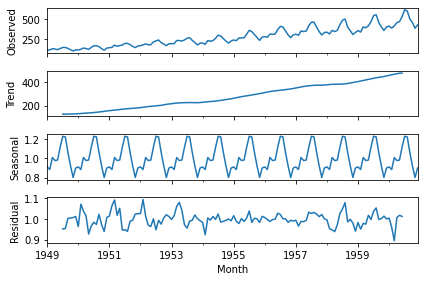

In [53]:
decomposition = seasonal_decompose(dados_pass.set_index('Month'), model = 'multiplicative')
plt.figure(figsize=(15,5))
fig = decomposition.plot()

plt.show();

In [56]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

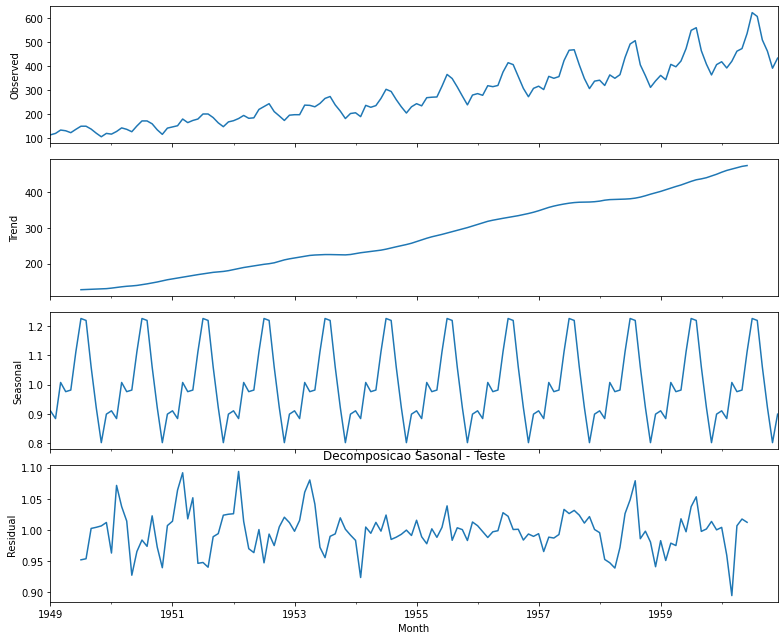

In [57]:


decomposition = seasonal_decompose(dados_pass.set_index('Month'), model = 'multiplicative')
fig = decomposition.plot()
plt.title('Decomposicao Sasonal - Teste')
plt.show()
